In [22]:
#Importo la librerias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree

from sklearn.model_selection import train_test_split 
import sklearn

In [23]:
#importo el dataset y hago revision de los datos

df = pd.read_csv("titles_filtrado.csv")



In [24]:
# Drop de columnas innecesarias
df.drop("id", inplace=True, axis=1)

df.drop("imdb_id", inplace=True, axis=1)

# Limpio `genres` y `production_countries`, devuelta tomando el primer elemento de de la lista que cada valor retenga
def parse_list(row):
    parsed = str(row)[1:-1].split(",")
    for i in range(len(parsed)):
        parsed[i] = parsed[i].strip()[1:-1]
        
    return parsed[0] if parsed[0] != '' else 'N/A'

df['genres_parsed'] = df['genres'].map(parse_list)
df['prod_countries_parsed'] = df['production_countries'].map(parse_list)
df[['genres_parsed', 'prod_countries_parsed']]

,genres_parsed,prod_countries_parsed
0,documentation,US
1,drama,US
2,drama,US
3,fantasy,GB
4,war,GB
...,...,...
5845,romance,NG
5846,drama,N/A
5847,comedy,CO
5848,N/A,US


In [25]:
# Añado la columna 'is_movie'
df['is_movie'] = df.type.map(lambda x: 0 if x == 'SHOW' else 1)

In [26]:
# Obtengo todos los valores nulos
df.isnull().sum()

Unnamed: 0                  0
title                       1
type                        0
description                18
release_year                0
age_certification        2619
runtime                     0
genres                      0
production_countries        0
seasons                  3744
imdb_score                  0
imdb_votes                498
tmdb_popularity            91
tmdb_score                  0
genres_parsed               0
prod_countries_parsed       0
is_movie                    0
dtype: int64

In [27]:
# Drop de columnas innecesarias
df.drop("title", axis=1, inplace=True)
df.drop("description", axis=1, inplace=True)

# Relleno valores nulos
df['age_certification'].fillna("N/A", inplace=True)
df['seasons'].fillna(0.0, inplace=True)
df['tmdb_popularity'].fillna(df['tmdb_popularity'].mean(), inplace=True)
df['imdb_votes'].fillna(df['imdb_votes'].mean(), inplace=True)



In [28]:
# Trasnfroma las variables categoricas en numericas
all_data = pd.get_dummies(df[[  'age_certification',
                                'genres_parsed', 
                                'prod_countries_parsed', 
                                'imdb_votes', 
                                'seasons', 
                                'is_movie',
                                'release_year',
                                'runtime']])



In [29]:
from sklearn.model_selection import train_test_split, cross_val_score

X = all_data.copy()
y = df['imdb_score']


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Creo las variables

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [44]:
from sklearn.neural_network import MLPRegressor

regrMLP = MLPRegressor(random_state=1, max_iter=200)

regrMLP.fit(X_train, y_train)

MLPRegressor(random_state=1)

In [45]:
y_pred_MLP = regrMLP.predict(X_test)

In [55]:
regrMLP.score(X_test, y_test)

-8491.072849827242

In [76]:
import math
from sklearn.metrics import mean_squared_error 

scores_RMSE = math.sqrt(mean_squared_error(y_test, regrMLP.predict(X_test)))

print(scores_RMSE)

89.50673270729685


In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {'random_state': [0, 1 , 42], 'max_iter': [200,500,1000],'learning_rate': ['constant','adaptive']}

grid = GridSearchCV(MLPRegressor(),param_grid,refit=True,verbose=2)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END learning_rate=constant, max_iter=200, random_state=0; total time=   1.3s
[CV] END learning_rate=constant, max_iter=200, random_state=0; total time=   2.4s
[CV] END learning_rate=constant, max_iter=200, random_state=0; total time=   3.3s
[CV] END learning_rate=constant, max_iter=200, random_state=0; total time=   4.5s
[CV] END learning_rate=constant, max_iter=200, random_state=0; total time=   2.9s
[CV] END learning_rate=constant, max_iter=200, random_state=1; total time=   2.6s
[CV] END learning_rate=constant, max_iter=200, random_state=1; total time=   4.4s
[CV] END learning_rate=constant, max_iter=200, random_state=1; total time=   6.6s
[CV] END learning_rate=constant, max_iter=200, random_state=1; total time=   5.2s
[CV] END learning_rate=constant, max_iter=200, random_state=1; total time=   5.9s
[CV] END learning_rate=constant, max_iter=200, random_state=42; total time=   2.0s
[CV] END learning_rate=constant, max

GridSearchCV(estimator=MLPRegressor(),
             param_grid={'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [200, 500, 1000],
                         'random_state': [0, 1, 42]},
             verbose=2)

In [43]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

MLPRegressor(random_state=1)
{'learning_rate': 'constant', 'max_iter': 200, 'random_state': 1}
-435.183320640504


In [48]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_classification

clf = BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=1)
clf.fit(X_train,y_train)


BaggingRegressor(base_estimator=SVR(), random_state=1)

In [51]:
y_pred_clf = clf.predict(X_test)

In [53]:
clf.score(X_test,y_test)

0.04671516816678534

In [54]:
print(y_pred_clf)

[6.4979655  6.51473247 6.49765213 ... 6.49766313 6.59984979 6.49755882]


In [73]:
import math
from sklearn.metrics import mean_squared_error 

scores_RMSE = math.sqrt(mean_squared_error(y_test, clf.predict(X_test)))

print(scores_RMSE)

1.0859107929719791


In [56]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [57]:
#Hacemos nuestras predicciones
y_pred_lin = regressor.predict(X_test)

Vemos que las predicciones son bastante acertadas.

In [74]:
regressor.score(X_test, y_test)

scores_RMSE = math.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))

print(scores_RMSE)

0.9719987094390086


Pero mediante la funcion "score" nos da un puntaje de 20%

In [59]:
#Este es un metodo para ver el error en el modelo

from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def score_dataset(X_train, X_valid, y_train, y_valid, model=RandomForestRegressor(n_estimators=1000, random_state=0)):
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return {"mean_squared_error": mean_squared_error(y_valid, preds), "mean_absolute_error": mean_absolute_error(y_valid, preds), "mean_absolute_percentage_error": mean_absolute_percentage_error(y_test, preds)}

In [60]:
scores = -1 * cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

score_dataset(X_train, X_test, y_train, y_test, model=LinearRegression())

{'mean_squared_error': 0.9957766296087186,
 'mean_absolute_error': 0.7582053673715271,
 'mean_absolute_percentage_error': 0.13649126219042554}

In [61]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr = make_pipeline(StandardScaler(), SVR(C=1, epsilon=1,gamma=1e-2, kernel='rbf'))
regr.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1, epsilon=1, gamma=0.01))])

In [62]:
score_dataset(X_train, X_test, y_train, y_test, model=SVR())

{'mean_squared_error': 1.1787296646602188,
 'mean_absolute_error': 0.8170935452503241,
 'mean_absolute_percentage_error': 0.1472830175981398}

In [63]:
y_pred_svr = regr.predict(X_test)


In [64]:
regr.score(X_test, y_test)

0.22652926650634642

In [75]:
scores_RMSE = math.sqrt(mean_squared_error(y_test, regr.predict(X_test)))

print(scores_RMSE)

0.986295458922341


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

regr = make_pipeline(StandardScaler(), SVR(C=1, epsilon=1,gamma=1e-2, kernel='rbf'))
regr.fit(X_train, y_train)

regr.predict(X_test)
regr.score(X_test, y_test)

#SVR(C=0.1, epsilon=1, kernel='sigmoid')
#{'C': 10, 'epsilon': 1, 'kernel': 'rbf'}
#{'C': 1, 'epsilon': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

0.21073607848705767

In [54]:
score_dataset(X_train, X_test, y_train, y_test, model=SVR())

{'mean_squared_error': 1.1849125626169297,
 'mean_absolute_error': 0.8273938191844066,
 'mean_absolute_percentage_error': 0.1511161376410793}

In [38]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1 , 10], 'epsilon': [0.1,0.01,1],'kernel': ['sigmoid','rbf','poly']}


grid = GridSearchCV(SVR(cache_size=500),param_grid,refit=True,verbose=2)

grid.fit(X_train,y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .................C=0.1, epsilon=0.1, kernel=sigmoid; total time=   1.9s
[CV] END .................C=0.1, epsilon=0.1, kernel=sigmoid; total time=   1.7s
[CV] END .................C=0.1, epsilon=0.1, kernel=sigmoid; total time=   1.6s
[CV] END .................C=0.1, epsilon=0.1, kernel=sigmoid; total time=   1.6s
[CV] END .................C=0.1, epsilon=0.1, kernel=sigmoid; total time=   1.7s
[CV] END .....................C=0.1, epsilon=0.1, kernel=rbf; total time=   2.2s
[CV] END .....................C=0.1, epsilon=0.1, kernel=rbf; total time=   2.1s
[CV] END .....................C=0.1, epsilon=0.1, kernel=rbf; total time=   2.1s
[CV] END .....................C=0.1, epsilon=0.1, kernel=rbf; total time=   2.2s
[CV] END .....................C=0.1, epsilon=0.1, kernel=rbf; total time=   2.6s
[CV] END ....................C=0.1, epsilon=0.1, kernel=poly; total time=   7.2s
[CV] END ....................C=0.1, epsilon=0.1

GridSearchCV(estimator=SVR(cache_size=500),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.01, 1],
                         'kernel': ['sigmoid', 'rbf', 'poly']},
             verbose=2)

In [40]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

SVR(C=10, cache_size=500, epsilon=1)
{'C': 10, 'epsilon': 1, 'kernel': 'rbf'} /n
0.048874324540021274 /n


In [41]:
from sklearn.metrics import classification_report

y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

ValueError: continuous is not supported

In [42]:
def print_dataframe(filtered_cv_results):
    """Pretty print for filtered dataframe"""
    for mean_precision, std_precision, mean_recall, std_recall, params in zip(
        filtered_cv_results["mean_test_precision"],
        filtered_cv_results["std_test_precision"],
        filtered_cv_results["mean_test_recall"],
        filtered_cv_results["std_test_recall"],
        filtered_cv_results["params"],
    ):
        print(
            f"precision: {mean_precision:0.3f} (±{std_precision:0.03f}),"
            f" recall: {mean_recall:0.3f} (±{std_recall:0.03f}),"
            f" for {params}"
        )
    print()


def refit_strategy(cv_results):
    """Define the strategy to select the best estimator.

    The strategy defined here is to filter-out all results below a precision threshold
    of 0.98, rank the remaining by recall and keep all models with one standard
    deviation of the best by recall. Once these models are selected, we can select the
    fastest model to predict.

    Parameters
    ----------
    cv_results : dict of numpy (masked) ndarrays
        CV results as returned by the `GridSearchCV`.

    Returns
    -------
    best_index : int
        The index of the best estimator as it appears in `cv_results`.
    """
    # print the info about the grid-search for the different scores
    precision_threshold = 0.98

    cv_results_ = pd.DataFrame(cv_results)
    print("All grid-search results:")
    print_dataframe(cv_results_)

    # Filter-out all results below the threshold
    high_precision_cv_results = cv_results_[
        cv_results_["mean_test_precision"] > precision_threshold
    ]

    print(f"Models with a precision higher than {precision_threshold}:")
    print_dataframe(high_precision_cv_results)

    high_precision_cv_results = high_precision_cv_results[
        [
            "mean_score_time",
            "mean_test_recall",
            "std_test_recall",
            "mean_test_precision",
            "std_test_precision",
            "rank_test_recall",
            "rank_test_precision",
            "params",
        ]
    ]

    # Select the most performant models in terms of recall
    # (within 1 sigma from the best)
    best_recall_std = high_precision_cv_results["mean_test_recall"].std()
    best_recall = high_precision_cv_results["mean_test_recall"].max()
    best_recall_threshold = best_recall - best_recall_std

    high_recall_cv_results = high_precision_cv_results[
        high_precision_cv_results["mean_test_recall"] > best_recall_threshold
    ]
    print(
        "Out of the previously selected high precision models, we keep all the\n"
        "the models within one standard deviation of the highest recall model:"
    )
    print_dataframe(high_recall_cv_results)

    # From the best candidates, select the fastest model to predict
    fastest_top_recall_high_precision_index = high_recall_cv_results[
        "mean_score_time"
    ].idxmin()

    print(
        "\nThe selected final model is the fastest to predict out of the previously\n"
        "selected subset of best models based on precision and recall.\n"
        "Its scoring time is:\n\n"
        f"{high_recall_cv_results.loc[fastest_top_recall_high_precision_index]}"
    )

    return fastest_top_recall_high_precision_index

In [43]:
param_grid2 = [
    {"kernel": ["rbf"],'epsilon': [0.1,0.01,1], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
]


grid2 = GridSearchCV(SVR(cache_size=500),param_grid2,refit=True,verbose=2)

grid2.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..........C=1, epsilon=0.1, gamma=0.001, kernel=rbf; total time=   3.2s
[CV] END ..........C=1, epsilon=0.1, gamma=0.001, kernel=rbf; total time=   3.2s
[CV] END ..........C=1, epsilon=0.1, gamma=0.001, kernel=rbf; total time=   3.2s
[CV] END ..........C=1, epsilon=0.1, gamma=0.001, kernel=rbf; total time=   2.8s
[CV] END ..........C=1, epsilon=0.1, gamma=0.001, kernel=rbf; total time=   2.7s
[CV] END .........C=1, epsilon=0.1, gamma=0.0001, kernel=rbf; total time=   2.9s
[CV] END .........C=1, epsilon=0.1, gamma=0.0001, kernel=rbf; total time=   2.9s
[CV] END .........C=1, epsilon=0.1, gamma=0.0001, kernel=rbf; total time=   3.1s
[CV] END .........C=1, epsilon=0.1, gamma=0.0001, kernel=rbf; total time=   3.0s
[CV] END .........C=1, epsilon=0.1, gamma=0.0001, kernel=rbf; total time=   3.2s
[CV] END .........C=1, epsilon=0.01, gamma=0.001, kernel=rbf; total time=   3.4s
[CV] END .........C=1, epsilon=0.01, gamma=0.00

GridSearchCV(estimator=SVR(cache_size=500),
             param_grid=[{'C': [1, 10, 100, 1000], 'epsilon': [0.1, 0.01, 1],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
             verbose=2)

In [45]:
print(grid2.best_estimator_)
print(grid2.best_params_)
print(grid2.best_score_)

SVR(C=1, cache_size=500, epsilon=1, gamma=0.0001)
{'C': 1, 'epsilon': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.06285960687209602


In [40]:
df_predicciones = pd.DataFrame({'Actual': y_test, 'Predicted_Lin': y_pred_lin, 'Predicted_SVR': y_pred_svr})
df_predicciones

,Actual,Predicted_Lin,Predicted_SVR
2089,7.0,6.831118,7.014861
4909,5.6,5.888682,5.684284
2961,5.8,6.079749,5.732297
2070,5.9,6.195104,6.290393
3054,7.3,7.396632,7.728972
...,...,...,...
1771,8.5,7.526298,7.471590
5636,5.5,6.306887,6.147662
5557,6.4,6.071234,5.971462
514,7.2,7.431180,7.232665


In [41]:
df_predicciones['Promedio']= (df_predicciones['Predicted_Lin'] + df_predicciones['Predicted_SVR']) /2

df_predicciones

,Actual,Predicted_Lin,Predicted_SVR,Promedio
2089,7.0,6.831118,7.014861,6.922989
4909,5.6,5.888682,5.684284,5.786483
2961,5.8,6.079749,5.732297,5.906023
2070,5.9,6.195104,6.290393,6.242749
3054,7.3,7.396632,7.728972,7.562802
...,...,...,...,...
1771,8.5,7.526298,7.471590,7.498944
5636,5.5,6.306887,6.147662,6.227274
5557,6.4,6.071234,5.971462,6.021348
514,7.2,7.431180,7.232665,7.331923


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

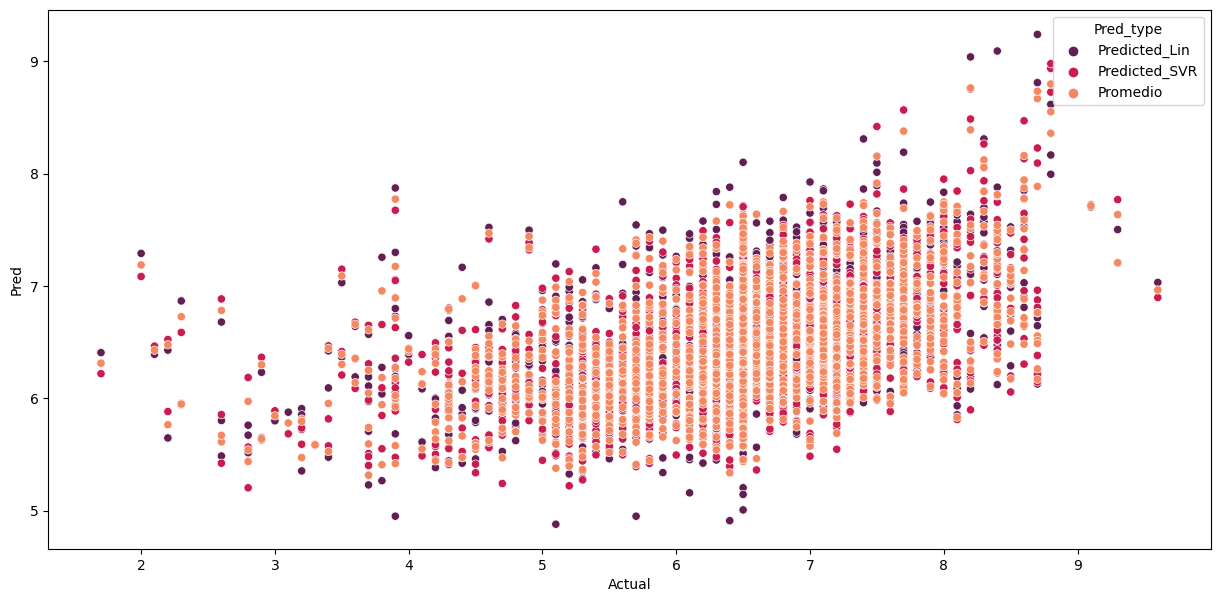

In [47]:
from matplotlib.pyplot import figure


df_to_scatter = df_predicciones.melt('Actual',var_name='Pred_type', value_name='Pred')

figure(figsize=(15,7))
sns.scatterplot(x=df_to_scatter['Actual'], y=df_to_scatter['Pred'], hue=df_to_scatter['Pred_type'],palette='rocket')
#sns.scatterplot(x=df_predicciones['Actual'], y=df_predicciones['Predicted_SVR'])
#sns.scatterplot(x=df_predicciones['Actual'], y=df_predicciones['Promedio'])

In [69]:
regresor = make_pipeline(StandardScaler(), LinearRegression(), SVR(), BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=1), MLPRegressor(random_state=1, max_iter=200))


regresor.fit(X_train, y_train)

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'LinearRegression()' (type <class 'sklearn.linear_model._base.LinearRegression'>) doesn't